# Optimization in Neural Networks

Building a neural network involves three steps：

**Function Approximation --> Object Function  --> Optimization**

In this work, I will focus on optimization and the effects of model hyperparameters. What is more, cross-valdiation will be adopted for hyperparameters selection.  

Python libraries used: Keras, Pyplot


In [112]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
#fixed random seed
seed = 123
np.random.seed(seed)

### Data Loading

I will use the MNIST dataset which consists of grayscale images of handwritten digits (0-9) whose dimension is 28x28 pixels. Each pixel is 8 bits so its value ranges from 0 to 255.

In [113]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

Each label is a number between 0 and 9

In [114]:
print(y_train)

[5 0 4 ... 5 6 8]


Let's look at some 10 of the images

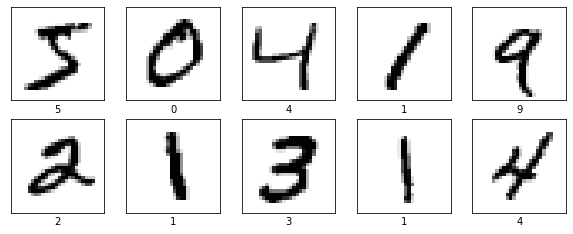

In [115]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [116]:
#check some data
x_train[45, 15:20, 15:20]

array([[ 11, 198, 231,  41,   0],
       [ 82, 252, 204,   0,   0],
       [253, 253, 141,   0,   0],
       [252, 220,  36,   0,   0],
       [252,  96,   0,   0,   0]], dtype=uint8)

## Preprocessing the data

#### Preprocessing the data

To run our NN, we need to pre-process the data

* First we need to make the 2D image arrays into 1D (flatten them). We can either perform this by using array reshaping with `numpy.reshape()` or the `keras`' method for this: a layer called `tf.keras.layers.Flatten` which transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1D-array of 28 * 28 = 784 pixels. 

* Then we need to normalize the pixel values (give them values between 0 and 1) using the following transformation:

\begin{align}
x := \dfrac{x - x_{min}}{x_{max} - x_{min}} 
\textrm{}
\end{align}

In our case $x_{min} = 0$ and $x_{max} = 255$ so the formula becomes simply $x := {x}/255$ 

In [117]:
#### your code here
model = keras.models.Sequential() # create a container

# Then, use add() to insert layers into the container
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [118]:
print(x_test.shape)

(10000, 28, 28)


In [119]:
x_train = x_train.reshape(-1,28*28)
x_test  = x_test.reshape(-1,28*28)

In [120]:
print( x_train.shape )
print( x_test.shape )
print( y_train.shape )
print( y_test.shape )

(60000, 784)
(10000, 784)
(60000,)
(10000,)


Then we need to normalize the pixel values (give them values between 0 and 1) using the following transformation:

\begin{align}
x := \dfrac{x - x_{min}}{x_{max} - x_{min}} 
\textrm{}
\end{align}

In our case $x_{min} = 0$ and $x_{max} = 255$ so the formula becomes simply $x := {x}/255$ 

In [121]:

x_train, x_test = x_train / 255.0, x_test / 255.0

print( x_train.shape )
print( x_test.shape )
print( y_train.shape )
print( y_test.shape )

(60000, 784)
(10000, 784)
(60000,)
(10000,)


Now let's prepare our class vector (y) to a binary class matrix, e.g. for use with categorical_crossentropy.

In [122]:
# Convert class vectors to binary class matrices
from keras.utils import to_categorical
num_classes = 10
class_names = ["0", "1", "2", "3", 
                "4", "5", "6", "7",
                "8", "9" ]

#### your code here

In [123]:
y_train[0]

5

In [124]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [125]:
print( x_train.shape )
print( x_test.shape )
print( y_train.shape )
print( y_test.shape )

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [126]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Stochastic Gradient Descent for NN 

One of the most common optimization algorithm is Stochastic Gradient Descent (SGD). The hyperparameters in SGD are given as below:

1. `learning rate`: controls the weight at the end of each batch

2. `momentum`: controls how much to let the previous update influence the current weight update

3. `decay`: indicates the learning rate decay over each update,:  

4. `nesterov`: takes the value True or False depending on if we want to apply Nesterov momentum

In this work, we would like to explore the effects of the learning rate. We will set momentum=0, decay=0 and nesterov=Fasle.

In [127]:
import tensorflow as tf
import keras
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

- Be familiar with the implementation in `keras`.

In [128]:
epochs = 40
learning_rate = 0.1
decay_rate = 0
momentum = 0
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [129]:
# build the model
input_dim = x_train.shape[1]
lr_model = Sequential()
lr_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', 
                input_dim = input_dim)) # fully-connected layer with 64 hidden units
lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
lr_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

# Fit the model
batch_size = 128

lr_model_history = lr_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))

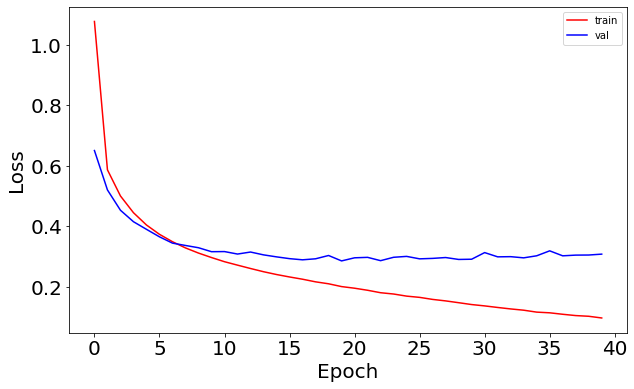

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

learning rate as 10

In [131]:
#### your code here
epochs = 40
learning_rate = 10
decay_rate = 0
momentum = 0
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [132]:
# build the model
input_dim = x_train.shape[1]
lr_model = Sequential()
lr_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', 
                input_dim = input_dim)) # fully-connected layer with 64 hidden units
lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
lr_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

# Fit the model
batch_size = 128

lr_model_history = lr_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))

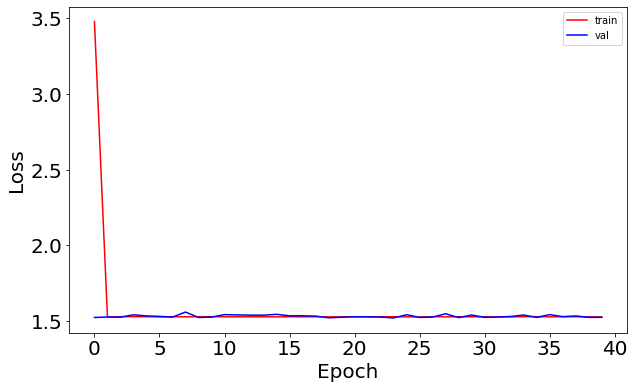

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

learning rate as 0.001

In [134]:
#### your code here
epochs = 40
learning_rate = 0.001
decay_rate = 0
momentum = 0
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [135]:
# build the model
input_dim = x_train.shape[1]
lr_model = Sequential()
lr_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', 
                input_dim = input_dim)) # fully-connected layer with 64 hidden units
lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
lr_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

# Fit the model
batch_size = 128

lr_model_history = lr_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))

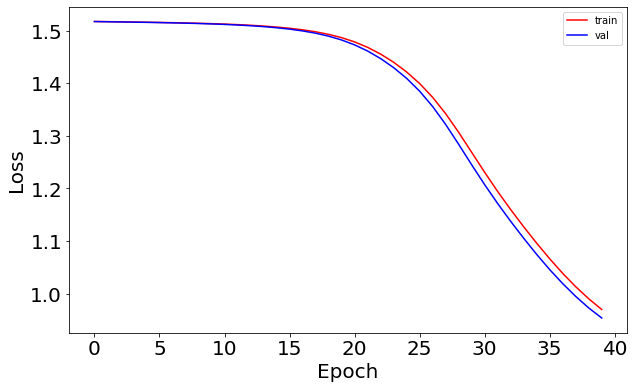

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

```Both curves descend with no gap between training and validation curves:  we need probably improve the model weight initialization.  ```

## Tuning the Hyperparameters using Cross Validation

Instead of trying different values by hand, GridSearchCV from sklearn could be used to explore different hyperparameters and compare the results.

However, one more step required for `keras` is to introduce the wrappers for the sklearn API. To do cross-validation with `keras` we will use the wrappers for the Scikit-Learn API. The wrapper enable the sequential keras model (single-input only) as part of the sklearn workflow. 

The wrapper is provided in keras:

`keras.wrappers.scikit_learn.KerasClassifier(build_fn=None, **sk_params)`, which implements the Scikit-Learn classifier interface.

In following, we will explore different initalization functions including:
```
['uniform', 'normal', 'he_normal', 'he_uniform']
```

In [137]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [138]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=784)) 
    model.add(Dropout(rate=0.5))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(10, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [139]:
batch_size = 128
epochs = 20

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'normal', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-139-fa79693d8ff4>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)


Best: 0.961733 using {'init_mode': 'he_uniform'}
0.959033 (0.001781) with: {'init_mode': 'uniform'}
0.959033 (0.001969) with: {'init_mode': 'normal'}
0.961100 (0.000765) with: {'init_mode': 'he_normal'}
0.961733 (0.001528) with: {'init_mode': 'he_uniform'}


In [140]:
#### your code here
def create_model(init_mode='uniform',batch_size=128, dropout_rate=0.5):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=784)) 
    model.add(Dropout(rate=0.5))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(10, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model
#RETURN the grid_result

In [141]:
batch_size = 128
epochs = 20

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
# define the grid search parameters
init_mode = ['glorot_uniform','uniform']
batch_size = [128, 512]
dropout_rate = [0.5, 0.8]
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

<ipython-input-141-dc4ae544244f>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)


In [142]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.961283 using {'init_mode': 'glorot_uniform'}
0.961283 (0.001352) with: {'init_mode': 'glorot_uniform'}
0.959567 (0.001066) with: {'init_mode': 'uniform'}


#### Thoughts:

The above process is very time consuming. One way to speed up the cross-validation process for neural network training without sacrificing too much performances:

```We can use pre-training: pre-training networks on large datasets or transferring learning from pre-trained models can reduce the number of participants that need to be learned and speed up the training process.```